# Apple Workout Analysis - Distance Walked or Run


> This notebook retrieves Apple Workout data, selects a subset of workouts based on workout type, and sums the distance walked or run in those selected workouts.

This uses the `fulcra-api-python` module, which is available on GitHub
at [https://github.com/fulcradynamics/fulcra-api-python](https://github.com/fulcradynamics/fulcra-api-python).


In [ ]:
%pip install -qU fulcra-api


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 8.5 MB/s eta 0:00:00


In [ ]:
from fulcra_api.core import FulcraAPI
import seaborn as sns

fulcra = FulcraAPI()

## Logging in to Fulcra

To make calls to the API, call `authorize()` first.  You authorize the `FulcraAPI`
instance using your browser.  The `authorize()` function will generate a link below
that you should click to log in to Fulcra.  (Depending on the notebook front-end
you're using, this tab may open automatically. On Colaboratory and other hosted
solutions, pop-up blockers usually prevent this from happening.)

Once you've logged in, close the tab; you should see "Authorization succeeded"
displayed in the notebook output.  


In [ ]:
fulcra.authorize()

## Retrieving Workout Data

Once your `FulcraAPI` instance is authorized, you can now use it
to make API calls.

The `metric_time_series` function is used to create a Pandas dataframe.

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from concurrent.futures import ThreadPoolExecutor, as_completed

# Function to fetch Apple Workout data for a single day
def fetch_data_for_day(day):
    try:
        start_time = day.isoformat() + "Z"
        end_time = (day + timedelta(days=1)).isoformat() + "Z"

        workouts = fulcra.apple_workouts(
            start_time=start_time,
            end_time=end_time
        )

        # Convert the workouts data to a DataFrame
        df = pd.DataFrame(workouts)

        return df
    except Exception as e:
        print(f"Error fetching data for {day.date()}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame in case of error

# Example date range
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 1, 10)

# Generate a list of all days in the specified time period
days = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Use ThreadPoolExecutor to make parallel API calls
with ThreadPoolExecutor(max_workers=20) as executor:
    futures = [executor.submit(fetch_data_for_day, day) for day in days]

    # Collect the results as they complete
    dfs = [future.result() for future in as_completed(futures) if future.result() is not None and not future.result().empty]

# Concatenate all dataframes into one
df = pd.concat(dfs, ignore_index=True)

print(f"Data fetched from {start_date.date()} to {end_date.date()}.")


Data fetched from 2024-01-01 to 2024-01-10.


## Display the Dataframe

Once the data is retrieved and combined into the dataframe, the following code will display the dataframe for inspection.

In [ ]:
from IPython.display import display

# Assuming 'df' is your DataFrame
display(df)

,start_date,end_date,has_undetermined_duration,apple_workout_id,duration,extras,all_statistics,workout_activities,workout_activity_type,workout_events,source_revision,device
0,2024-01-10T16:16:46.636000Z,2024-01-10T17:57:58.151000Z,False,274af216-f6cb-401e-b711-b9a6e3851902,6071.514982,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': '274AF216-F6CB-401E-B711-B9A6E385190...,walking,"[{'type': 'segment', 'extras': {}, 'endDate': ...","{'name': 'Ash’s Apple Watch', 'version': '10.2...","{'name': 'Apple Watch', 'model': 'Watch', 'man..."
1,2024-01-10T10:42:34.451000Z,2024-01-10T13:20:00.024000Z,False,596bbfe3-3c33-4d0a-a3a5-70ac49269898,9445.572818,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': '596BBFE3-3C33-4D0A-A3A5-70AC4926989...,fitnessGaming,[],"{'name': 'Ash’s Apple Watch', 'version': '10.2...","{'name': 'Apple Watch', 'model': 'Watch', 'man..."
2,2024-01-10T15:21:23.829000Z,2024-01-10T16:07:50.365000Z,False,29c81018-eef6-4d6f-b4de-a2d6d8148946,2786.535201,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': '29C81018-EEF6-4D6F-B4DE-A2D6D814894...,walking,[],"{'name': 'Ash’s Apple Watch', 'version': '10.2...","{'name': 'Apple Watch', 'model': 'Watch', 'man..."
3,2024-01-02T10:36:03.181000Z,2024-01-02T11:40:09.942000Z,False,49e1a54f-2f93-4a3c-9e3e-c82ed63d945e,3846.761383,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': '49E1A54F-2F93-4A3C-9E3E-C82ED63D945...,fitnessGaming,[],"{'name': 'Ash’s Apple Watch', 'version': '10.2...","{'name': 'Apple Watch', 'model': 'Watch', 'man..."
4,2024-01-02T11:40:14.681000Z,2024-01-02T11:56:05.892000Z,False,48cafbd8-304e-417b-a633-0a48ee345176,951.210519,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': '48CAFBD8-304E-417B-A633-0A48EE34517...,traditionalStrengthTraining,[],"{'name': 'Ash’s Apple Watch', 'version': '10.2...","{'name': 'Apple Watch', 'model': 'Watch', 'man..."
5,2024-01-02T11:56:18.742000Z,2024-01-02T12:53:20.273000Z,False,baae2c0b-472c-43ae-9ffc-41491836428a,3421.531081,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': 'BAAE2C0B-472C-43AE-9FFC-41491836428...,fitnessGaming,[],"{'name': 'Ash’s Apple Watch', 'version': '10.2...","{'name': 'Apple Watch', 'model': 'Watch', 'man..."
6,2024-01-02T13:34:16.679000Z,2024-01-02T16:31:27.049000Z,False,da5cb9b4-f03c-49c9-bfcc-25610c36807c,10630.369697,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': 'DA5CB9B4-F03C-49C9-BFCC-25610C36807...,walking,"[{'type': 'segment', 'extras': {}, 'endDate': ...","{'name': 'Ash’s Apple Watch', 'version': '10.2...","{'name': 'Apple Watch', 'model': 'Watch', 'man..."
7,2024-01-02T16:51:04.739000Z,2024-01-02T17:15:46.698000Z,False,e4cf3eec-fd2f-4be5-ab5d-800f7faf16ed,1481.958477,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': 'E4CF3EEC-FD2F-4BE5-AB5D-800F7FAF16E...,walking,[],"{'name': 'Ash’s Apple Watch', 'version': '10.2...","{'name': 'Apple Watch', 'model': 'Watch', 'man..."
8,2024-01-07T10:57:06.695000Z,2024-01-07T14:58:32.028000Z,False,00b34635-eaae-44b8-802a-271e8c0e00cb,14485.332914,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': '00B34635-EAAE-44B8-802A-271E8C0E00C...,fitnessGaming,[],"{'name': 'Ash’s Apple Watch Ultra', 'version':...","{'name': 'Apple Watch', 'model': 'Watch', 'man..."
9,2024-01-07T15:07:37.305000Z,2024-01-07T15:35:09.975000Z,False,a207f559-fede-42b3-ade3-2811ef7b7f3b,1652.670825,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': 'A207F559-FEDE-42B3-ADE3-2811EF7B7F3..

<ipython-input-7-b4314fc9c295>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='duration', y='workout_activity_type', inner='stick', palette='Dark2')


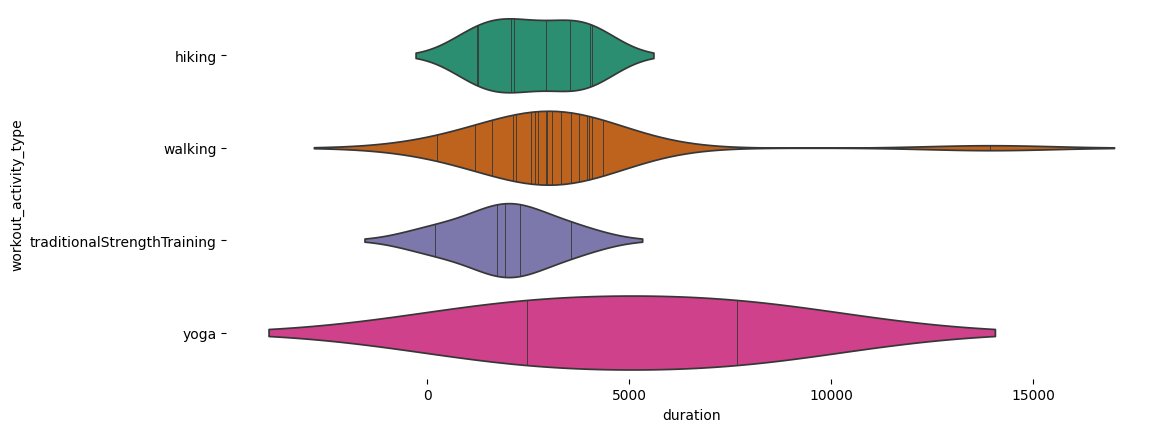

In [ ]:
# @title workout_activity_type vs duration (you can select different plots above)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['workout_activity_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='duration', y='workout_activity_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Select Specific Workout Types and Sum Distance

Additional information about each workout is stored in the "all_statistics" column of the dataframe.  The following code selects a subset of workouts based on the workout type in the "workout_activity_type" column (in this case "walking" and "fitnessGaming" workouts), and for that subset of workouts, sums the distances walked or run, stored as "HKQuantityTypeIdentifierDistanceWalkingRunning" in "all_statistics"

In [ ]:
import pandas as pd
import json  # for parsing string to dict if necessary

# Convert 'all_statistics' from a string representation of a dictionary to an actual dictionary
# Check if conversion is needed
if isinstance(df.iloc[0]['all_statistics'], str):
    df['all_statistics'] = df['all_statistics'].apply(json.loads)

# Filter for desired workout types
filtered_df = df[df['workout_activity_type'].isin(['walking', 'fitnessGaming'])]

# Sum distances, assuming the distance value is nested within another dictionary
total_distance = sum(
    workout['HKQuantityTypeIdentifierDistanceWalkingRunning']['sum']
    for workout in filtered_df['all_statistics']
    if 'HKQuantityTypeIdentifierDistanceWalkingRunning' in workout
)

print(f"Total distance walked or run: {total_distance} miles")

Total distance walked or run: 42.80501002830138 miles
